## Libraries Imported 

In [258]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import *  
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import *

## Importing Data

In [259]:
df=pd.read_csv("House_Price.csv") 
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [260]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [261]:
df.shape

(14620, 23)

In [262]:
df.isna().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [264]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [265]:
df.drop(columns=["id","Date"],inplace=True) #dropping unimportant features

### Data Visualisation

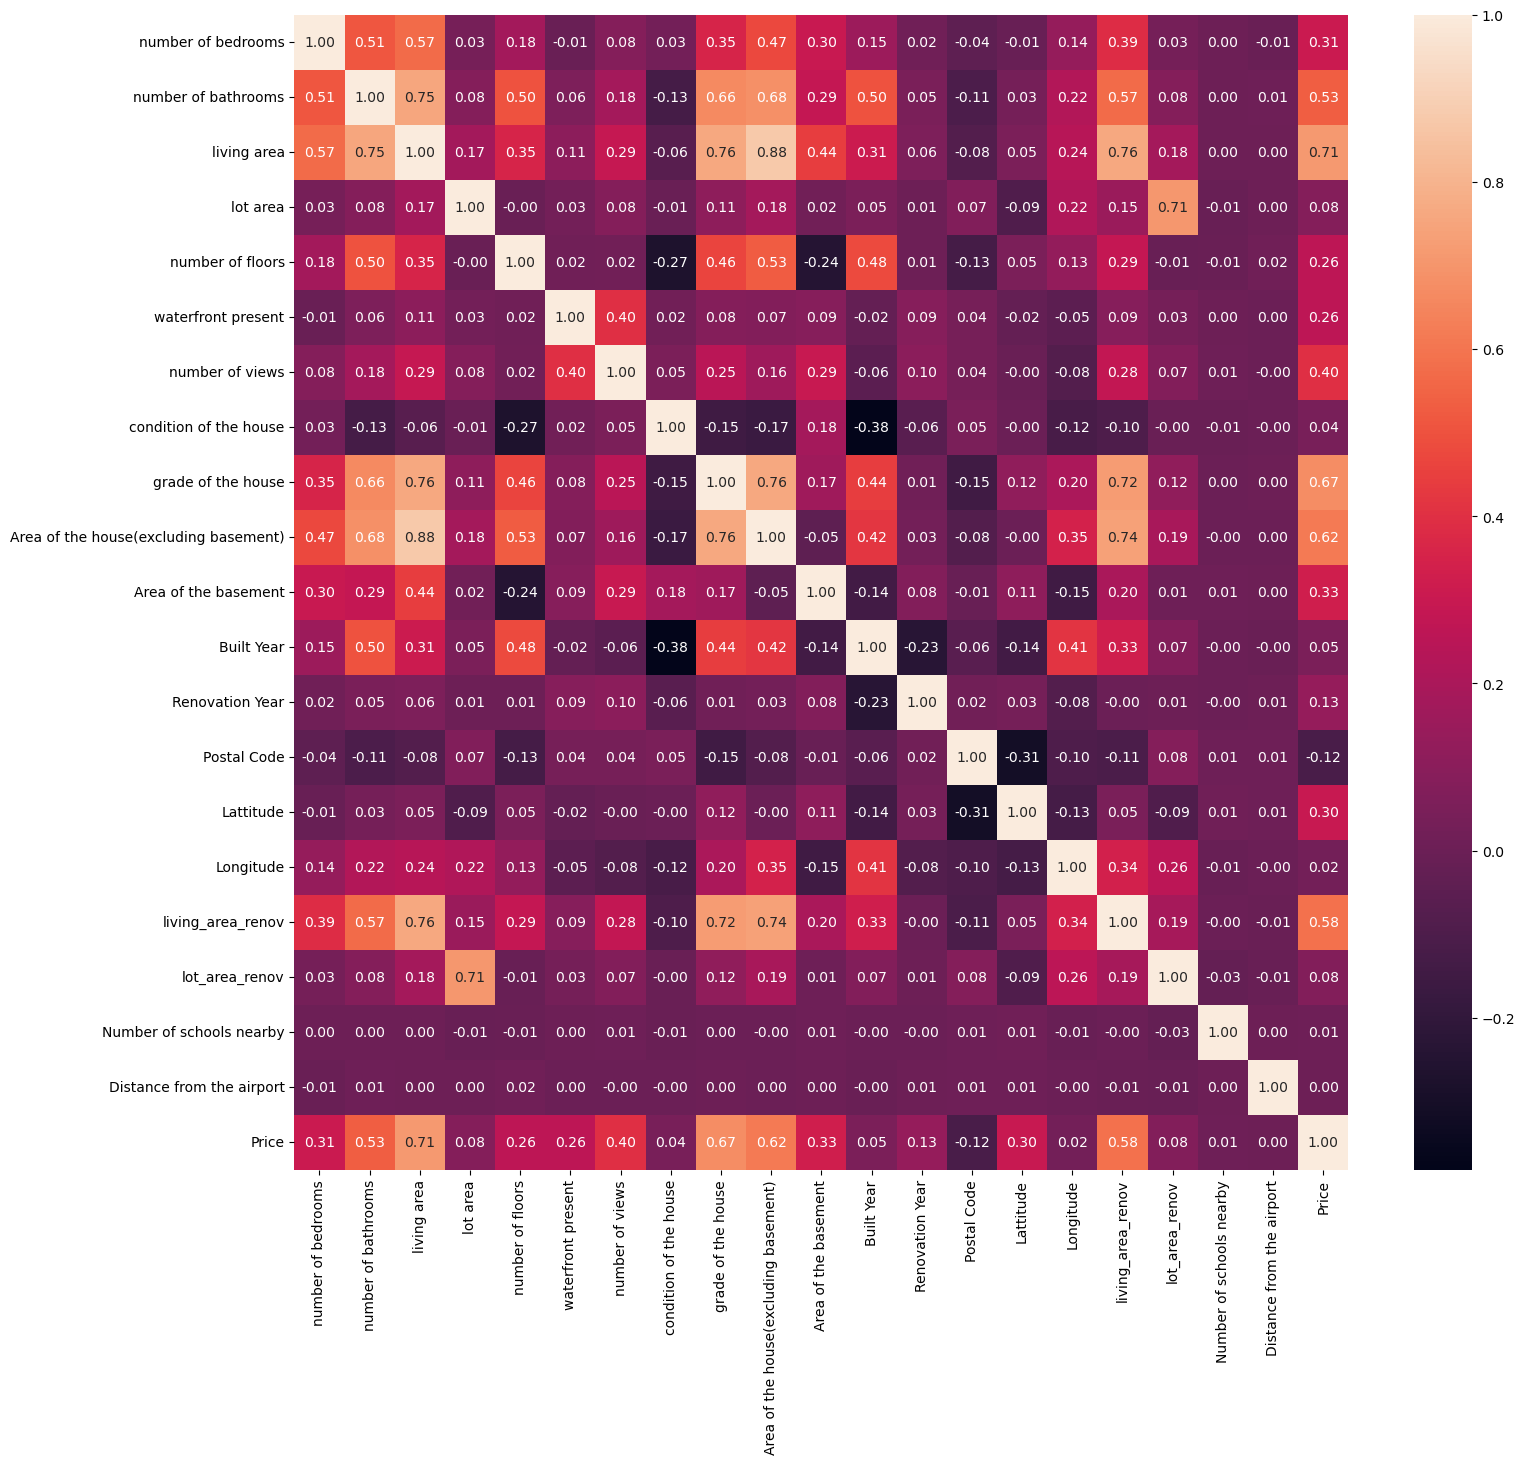

In [266]:
plt.figure(figsize=(17,15)) 
sns.heatmap(df.corr(),annot=True,fmt=".2f") 
plt.show()

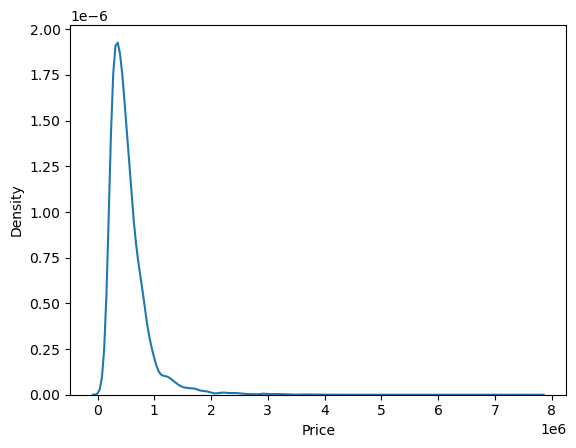

In [267]:
sns.kdeplot(df["Price"]) 
plt.xlabel("Price") 
plt.show()

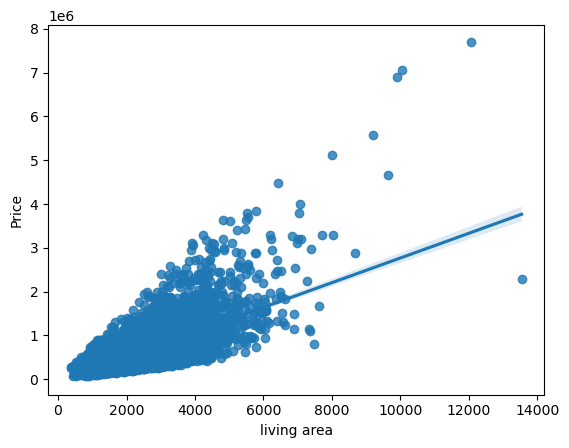

In [268]:
sns.regplot(data=df,x="living area",y="Price") 
plt.xlabel("Living area") 
plt.xlabel("living area")
plt.ylabel("Price")
plt.show()

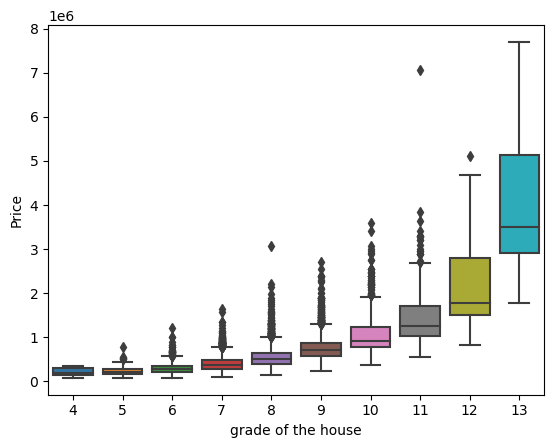

In [269]:
sns.boxplot(data=df1,x="grade of the house",y="Price") 
plt.xlabel("grade of the house") 
plt.ylabel("Price")
plt.show()

## Extarcting Important Features

In [270]:
imp=df.corr()["Price"].sort_values(ascending=False)[0:18].index 
imp

Index(['Price', 'living area', 'grade of the house',
       'Area of the house(excluding basement)', 'living_area_renov',
       'number of bathrooms', 'number of views', 'Area of the basement',
       'number of bedrooms', 'Lattitude', 'waterfront present',
       'number of floors', 'Renovation Year', 'lot area', 'lot_area_renov',
       'Built Year', 'condition of the house', 'Longitude'],
      dtype='object')

In [271]:
df=df.loc[:,imp]

In [272]:
df

,Price,living area,grade of the house,Area of the house(excluding basement),living_area_renov,number of bathrooms,number of views,Area of the basement,number of bedrooms,Lattitude,waterfront present,number of floors,Renovation Year,lot area,lot_area_renov,Built Year,condition of the house,Longitude
0,2380000,3650,10,3370,2880,2.50,4,280,5,52.8645,0,2.0,0,9050,5400,1921,5,-114.557
1,1400000,2920,8,1910,2470,2.50,0,1010,4,52.8878,0,1.5,0,4000,4000,1909,5,-114.470
2,1200000,2910,8,2910,2940,2.75,0,0,5,52.8852,0,1.5,0,9480,6600,1939,3,-114.468
3,838000,3310,9,3310,3350,2.50,0,0,4,52.9532,0,2.0,0,42998,42847,2001,3,-114.321
4,805000,2710,8,1880,2060,2.00,0,830,3,52.9047,0,1.5,0,4500,4500,1929,4,-114.485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,221700,1556,7,1556,2250,1.50,0,0,2,52.6191,0,1.0,0,20000,17286,1957,4,-114.472
14616,219200,1680,7,1680,1540,2.00,0,0,3,52.5075,0,1.5,0,7000,7480,1968,4,-114.393
14617,209000,1070,6,1070,1130,1.00,0,0,2,52.7289,0,1.0,0,6120,6120,1962,3,-114.507
14618,205000,1030,6,1030,1420,1.00,0,0,4,52.7157,0,1.0,0,6621,6631,1955,4,-114.411


## Splitting into Independent and Dependent

In [273]:
X=df.drop(columns=["Price"]) 
Y=df["Price"]

##  Splitting Into Training And Testing

In [274]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.25,random_state=42)

## Normalizing Data

In [275]:
M=MinMaxScaler() 
M.fit(Xtrain) 
Xtrain=M.transform(Xtrain) 
Xtest=M.transform(Xtest)

## Model Building

### Linear Regression

In [276]:
lr=LinearRegression() 
lr.fit(Xtrain,Ytrain) 
ypred=lr.predict(Xtest)

In [277]:
ypred

array([335615.85092508, 646311.35162518, 460955.64310546, ...,
       864890.25241578, 697235.61385879, 284705.2841938 ])

In [278]:
meanabsoluterror1=mean_absolute_error(Ytest,ypred)
r2score1=r2_score(Ytest,ypred)
rootmeansquarerror1=np.sqrt(mean_squared_error(Ytest,ypred))

In [279]:
df2=pd.DataFrame({"Metrics":[meanabsoluterror1,r2score1,rootmeansquarerror1]}, 
                 index=["meanabsoluterror","r2score","rootmeansquarerror"]) 
df2

,Metrics
meanabsoluterror,123245.216513
r2score,0.711274
rootmeansquarerror,201647.643499


### DecisionTreeRegressor

In [280]:
dt=DecisionTreeRegressor(criterion="squared_error",min_samples_split=5) 
dt.fit(Xtrain,Ytrain) 
ypred=dt.predict(Xtest)

In [281]:
ypred

array([383250.        , 462333.33333333, 520833.33333333, ...,
       270000.        , 723333.33333333, 301975.        ])

In [282]:
meanabsoluterror2=mean_absolute_error(Ytest,ypred)
r2score2=r2_score(Ytest,ypred)
rootmeansquarerror2=np.sqrt(mean_squared_error(Ytest,ypred))

In [283]:
df3=pd.DataFrame({"Metrics":[meanabsoluterror2,r2score2,rootmeansquarerror2]}, 
                 index=["meanabsoluterror","r2score","rootmeansquarerror"]) 
df3

,Metrics
meanabsoluterror,97992.741336
r2score,0.780522
rootmeansquarerror,175810.819579


### RandomForestRegressor

In [284]:
rf=RandomForestRegressor() 
rf.fit(Xtrain,Ytrain) 
ypred=rf.predict(Xtest)

In [285]:
ypred

array([304566.28, 632775.2 , 558385.5 , ..., 319830.81, 669422.5 ,
       267404.18])

In [286]:
meanabsoluterror3=mean_absolute_error(Ytest,ypred)
r2score3=r2_score(Ytest,ypred)
rootmeansquarerror3=np.sqrt(mean_squared_error(Ytest,ypred))

In [287]:
df4=pd.DataFrame({"Metrics":[meanabsoluterror3,r2score3,rootmeansquarerror3]}, 
                 index=["meanabsoluterror","r2score","rootmeansquarerror"])  
df4

,Metrics
meanabsoluterror,67631.069287
r2score,0.888771
rootmeansquarerror,125158.421592
